# Download Dataset and load it 

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jessicali9530/stanford-dogs-dataset

Saving kaggle.json to kaggle.json
 99% 740M/750M [00:07<00:00, 99.7MB/s]
100% 750M/750M [00:07<00:00, 111MB/s] 


In [2]:
!unzip /content/stanford-dogs-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/Images/n02108089-boxer/n02108089_11687.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_117.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11807.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11875.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_122.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12232.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_125.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12738.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12739.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12827.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13340.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13526.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1353.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1355.jpg  
  inflating: images/Images/n02108089-boxer/n021

In [3]:
import os 
x = os.listdir('/content/images/Images')

In [6]:
for i in x:
  import shutil
  print(i[10:])
  os.rename('/content/images/Images/'+i,'/content/images/Images/'+i[10:])

Old_English_sheepdog
Bernese_mountain_dog
African_hunting_dog
Saint_Bernard
Japanese_spaniel
kuvasz
cocker_spaniel
Lakeland_terrier
Norfolk_terrier
Samoyed
giant_schnauzer
schipperke
Mexican_hairless
pug
Chihuahua
German_short-haired_pointer
Sussex_spaniel
Labrador_retriever
toy_poodle
bluetick
Staffordshire_bullterrier
Newfoundland
Shetland_sheepdog
groenendael
borzoi
soft-coated_wheaten_terrier
Leonberg
Afghan_hound
Bedlington_terrier
West_Highland_white_terrier
Rottweiler
Italian_greyhound
whippet
Rhodesian_ridgeback
Sealyham_terrier
Norwich_terrier
Weimaraner
Chesapeake_Bay_retriever
keeshond
Tibetan_terrier
otterhound
dhole
toy_terrier
English_setter
affenpinscher
Pembroke
Kerry_blue_terrier
Yorkshire_terrier
Gordon_setter
Greater_Swiss_Mountain_dog
dingo
curly-coated_retriever
basenji
bull_mastiff
Airedale
basset
Tibetan_mastiff
Eskimo_dog
miniature_pinscher
Siberian_husky
Bouvier_des_Flandres
silky_terrier
collie
Great_Pyrenees
German_shepherd
golden_retriever
French_bulldog
Eng

# Train Model

In [7]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 727kB 17.3MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 194kB 51.1MB/s 
     |████████████████████████████████| 1.2MB 56.4MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 12.8MB 56.9MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [8]:
item_tfms=Resize(128, ResizeMethod.Squish)
item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')
item_tfms=RandomResizedCrop(128, min_scale=0.3)
tfms = aug_transforms(do_flip = True, flip_vert = False, mult=2.0)

In [9]:
path = Path ('/content/images/Images')

In [10]:
data= ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(128), batch_tfms=tfms, bs = 30, num_workers = 4)

In [11]:
Data = DataBlock( blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, 
splitter=RandomSplitter(valid_pct=0.2, seed=42), get_y=parent_label, item_tfms=Resize(128))
dls = Data.dataloaders(path)

In [12]:
learn = cnn_learner(data, resnet50, metrics=[error_rate,accuracy])
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.444353,1.356120,0.373178,0.626822,02:00


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.956636,1.276745,0.354470,0.645530,02:07
1,1.821011,1.224544,0.347182,0.652818,02:06
2,1.388652,0.931846,0.268222,0.731778,02:07
3,1.032771,0.878004,0.262148,0.737852,02:08


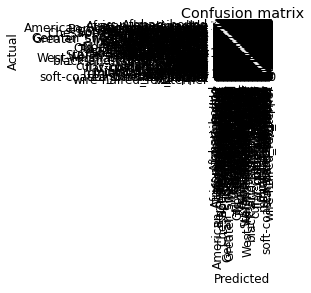

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

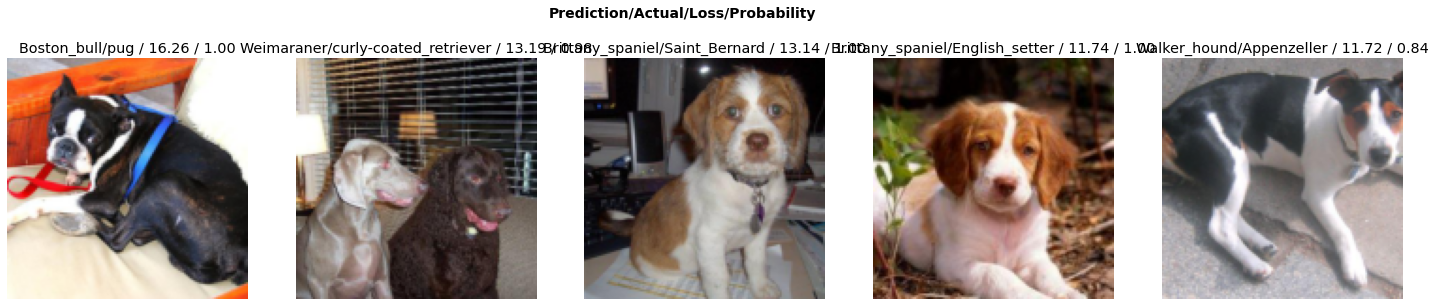

In [14]:
interp.plot_top_losses(5, nrows=1, figsize = (25,5))

In [15]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

### Export and Download model

In [22]:
!git clone https://github.com/Nikhil8bph/dog_breed_classifier_fastai.git

Cloning into 'dog_breed_classifier_fastai'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
!pip install -r /content/dog_breed_classifier_fastai/requirements.txt

In [20]:
learn.export('/content/dog_breed_classifier_fastai/export.pkl')

In [ ]:
from google.colab import files
files.download('/content/dog_breed_classifier_fastai/export.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
deployed_path = "/content/dog_breed_classifier_fastai/export.pkl"
learn1 = load_learner(deployed_path)

# Adding frontend

In [19]:
%cd /content/dog_breed_classifier_fastai

Archive:  /content/flask_frontend.zip
   creating: static/
  inflating: requirements.txt        
  inflating: templates/upload_page1.docx  
  inflating: templates/Thank_you.html  
  inflating: templates/upload_page1.html  


In [21]:
import os
from flask import Flask, request, redirect, url_for, flash, render_template,send_file
from werkzeug.utils import secure_filename
from flask_ngrok import run_with_ngrok
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
import fastai
import torch
import torchvision


UPLOAD_FOLDER = os.path.dirname(os.path.realpath('__file__'))
ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}

app = Flask(__name__)
run_with_ngrok(app)

filename = ""

b = "processing"
def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

@app.route('/', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        # check if the post request has the file part
        if 'file' not in request.files:
            flash('No file part')
            return redirect(request.url)
        file = request.files['file']
        # if user does not select file, browser also
        # submit a empty part without filename
        if file.filename == '':
            flash('No selected file')
            return redirect(request.url)
        if file and allowed_file(file.filename):
            global filename
            filename = secure_filename(file.filename)
            print(filename)
            file.save(os.path.join(UPLOAD_FOLDER, filename))
            return redirect(url_for('index',filename=filename))
    return render_template('upload_page1.html')

@app.route('/index', methods=['GET', 'POST'])
def index():
    global filename
    print("File Name : ",filename)
    deployed_path = "export.pkl"
    learn1 = load_learner(deployed_path)
    pred_class,pred_idx,outputs  = learn1.predict(filename) 
    #b = predictor(filename) #"I'll predict here"
    return render_template('Thank_you.html',something=str(pred_class))

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://7099726c351e.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [13/Apr/2021 05:49:07] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Apr/2021 05:49:08] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [13/Apr/2021 05:49:09] "GET / HTTP/1.1" 200 -
